### Recording: https://us02web.zoom.us/rec/share/4w_2tC6UK2fOuZBqEPL8rqP4SV75_luzpeerm6911nQv66evtsOr14opmlYJj4MO.AvVYflU_cNiMyeh7?startTime=1686605785000
Passcode: 0PRWZ*^G

### Data source: https://networkrepository.com/email-dnc.php

In [5]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Set up our NetworkX graph. Use 'MultiGraph' since this data contains both 1) so called "self loop" edges (node that connect
# to themselves), and duplicate edges (since emails were sent between the same people/nodes but at differing timestamps).
# We are also using "nx.DiGraph()" since the edges for our email data are directed, not undirected.
emails = nx.MultiGraph(create_using=nx.DiGraph())

file_path = r"C:\Users\bpinb\OneDrive\Desktop\Coursework\DATA 620 Web Analytics\Assignment 3 (week 2 part 1 Graph Viz)\email-dnc.edges"

with open(file_path, "r") as file:
    next(file)  # Skip first line
    for line in file:
        data = line.strip().split(",")
        node1 = data[0]
        node2 = data[1]
        timestamp = data[2]
        emails.add_edge(node1, node2, timestamp=timestamp)
        

print(emails.number_of_nodes())
print(emails.number_of_edges())

#emails.edges()

1891
39263


In [3]:
# Calculate degree centrality, show top 10.
centrality = nx.degree_centrality(emails)
sorted(centrality.items(), key=lambda x:x[1], reverse=True)[:11]

[('1874', 3.075661375661376),
 ('1839', 2.2793650793650797),
 ('1669', 1.9486772486772488),
 ('1258', 1.3613756613756616),
 ('1144', 1.2904761904761906),
 ('999', 1.1650793650793652),
 ('453', 1.1407407407407408),
 ('1369', 1.0185185185185186),
 ('1287', 0.8518518518518519),
 ('1625', 0.8015873015873016),
 ('1159', 0.7534391534391535)]

In [7]:
# Since graph is not connected and contains multiple subgraphs, calculate diameters of each.
components = nx.connected_components(emails)
diam=[]
for component in components:
    component_graph = emails.subgraph(component)
    diameter = nx.diameter(component_graph)
    diam.append(diameter)
    print("Diameter of component:", diameter)

# Also calculating mean diameter for non-isolated subgraphs.
print("Average overall:", sum(diam)/len(diam))
print("\n")
print("Average of non-isolated node subgraphs:", np.mean([x for x in diam if x > 0]))

Diameter of component: 8
Diameter of component: 0
Diameter of component: 1
Diameter of component: 1
Diameter of component: 1
Diameter of component: 1
Diameter of component: 0
Diameter of component: 0
Diameter of component: 0
Diameter of component: 0
Diameter of component: 0
Diameter of component: 0
Diameter of component: 0
Diameter of component: 1
Diameter of component: 0
Diameter of component: 1
Diameter of component: 0
Diameter of component: 0
Diameter of component: 0
Diameter of component: 0
Diameter of component: 0
Diameter of component: 0
Diameter of component: 0
Diameter of component: 2
Diameter of component: 0
Diameter of component: 1
Diameter of component: 0
Diameter of component: 0
Diameter of component: 0
Diameter of component: 0
Diameter of component: 1
Diameter of component: 0
Diameter of component: 0
Diameter of component: 1
Diameter of component: 1
Diameter of component: 0
Diameter of component: 1
Diameter of component: 1
Diameter of component: 1
Diameter of component: 2


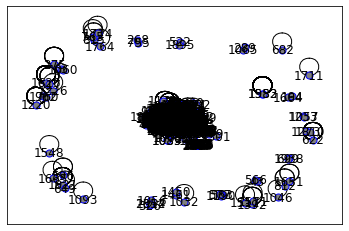

In [11]:
#g = nx.from_pandas_edgelist(emails,'From','To',create_using=nx.Graph())
nx.draw_networkx(emails,with_labels=True, edgecolors='blue', node_color='gray', node_size=50)
plt.show();

In [13]:
deg = nx.degree(emails)
print('Min:',min(dict(deg).values()),'Max:',max(dict(deg).values()))

Min: 1 Max: 5813


In [26]:
# Here we tried trimming down the size to see more of the common patterns across the network based on degree calculation
# from the textbook.
def trim_deg(graph,degree):
    '''
    Using the function shown to prune the network in the textbook
    '''
    g2=graph.copy()
    d=nx.degree(g2)
    for n in g2.nodes():
        if d[n]<=degree:
            g2.remove_node(n)
            return g2
        
emails2 = trim_deg(emails,degree=3)
emails3 = trim_deg(emails,degree=5)
print(len(emails2), len(emails3))

1890 1890


(11585, 4) (39264, 3)


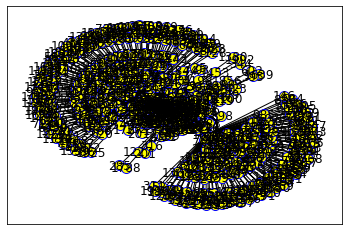

In [43]:
# Load the data as a csv
df = pd.read_csv('https://raw.githubusercontent.com/jforster19/Data620/main/email-dnc.csv',header=None,names=['From','To','TS'])

# Grab top 5 email senders - wind up with 11585 edges.
top_100 = pd.DataFrame(df.groupby('From')['To'].count().sort_values(ascending=[False]).head().reset_index())
trimmed = pd.merge(df,top_100,how='inner',on='From')
print(trimmed.shape, df.shape)

G2 = nx.from_pandas_edgelist(trimmed,'From','To_x',create_using=nx.MultiGraph())
nx.draw_networkx(G2,with_labels=True, edgecolors='blue', node_color='yellow', node_size=100)
plt.plot();

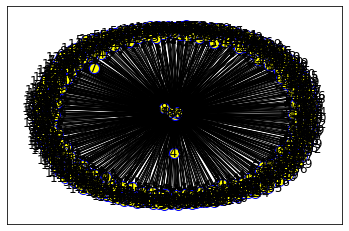

In [44]:
# Try with DiGraph instantiation
G3 = nx.from_pandas_edgelist(trimmed,'From','To_x',create_using=nx.DiGraph())
nx.draw_networkx(G3,with_labels=True, edgecolors='blue', node_color='yellow', node_size=100)
plt.plot();